<a href="https://colab.research.google.com/github/TooPercentMilk/MoGen/blob/main/HumanPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y git
!git clone https://github.com/TooPercentMilk/MoGen.git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
Cloning into 'MoGen'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (165/165), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 165 (delta 94), reused 116 (delta 46), pack-reused 0
Receiving objects: 100% (165/165), 20.78 MiB | 17.10 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [ ]:
%cd MoGen
%ls

/content/MoGen
ChatGPT.ipynb  Dataset_Investigation.ipynb  LSTM.ipynb  models/
data/          GPT2.ipynb                   LSTM.py     README.md


In [ ]:
from google.colab import drive
from google.colab import output
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import pandas as pd
import random
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive')
GOOGLE_DRIVE_PATH = '/content/drive/MyDrive/MoviePrediction'
os.chdir(GOOGLE_DRIVE_PATH)


Mounted at /content/drive


FileNotFoundError: ignored

In [ ]:
datasetRAW = pd.read_csv('data/train.csv')
datasetRAW.head(5)

,id,movie_name,synopsis,genre
0,44978,Super Me,A young scriptwriter starts bringing valuable ...,fantasy
1,50185,Entity Project,A director and her friends renting a haunted h...,horror
2,34131,Behavioral Family Therapy for Serious Psychiat...,This is an educational video for families and ...,family
3,78522,Blood Glacier,Scientists working in the Austrian Alps discov...,scifi
4,2206,Apat na anino,Buy Day - Four Men Widely - Apart in Life - By...,action


In [ ]:
label = []
pred = []
genres = ['fantasy', 'horror', 'family', 'scifi', 'action', 'crime', 'adventure', 'mystery', 'romance', 'thriller']
print(genres)

['fantasy', 'horror', 'family', 'scifi', 'action', 'crime', 'adventure', 'mystery', 'romance', 'thriller']


In [ ]:
while(True):
  idx = random.randint(0, len(datasetRAW))

  print(datasetRAW.iloc[idx]['movie_name'], " : ", datasetRAW.iloc[idx]['synopsis'])

  for (i, item) in enumerate(genres):
    print(i, ':', item, '  ', end = "")

  curPred = int(input("Predict the Genre"))
  pred.append(curPred)
  label.append(genres.index(datasetRAW.iloc[idx]['genre']))

  output.clear()


A Tale of Two Sisters  :  After spending time in a mental hospital, a girl is reunited with her sister and returns home, only to see some truly strange events start to happen.
0 : fantasy   1 : horror   2 : family   3 : scifi   4 : action   5 : crime   6 : adventure   7 : mystery   8 : romance   9 : thriller   

KeyboardInterrupt: ignored

In [ ]:
precision, recall, fscore, _ = precision_recall_fscore_support(label, pred, average='macro')
accuracy = accuracy_score(label, pred)
print('Precision:', precision, ' Recall:', recall, ' FScore:', fscore)
print('Accuracy:', accuracy)


ValueError: ignored

In [ ]:
print(label)
print()
print(pred)

[1, 9, 6, 9, 9, 5, 8, 2, 1, 8, 5, 4, 2, 2, 6, 3, 3, 8, 3, 0, 8, 8, 8, 4, 3, 2, 2, 4, 1, 9, 3, 3, 8, 7, 6, 5, 6, 3, 7, 3, 3, 1, 8, 6, 9, 5, 7, 2, 8, 4, 5, 8, 7, 5, 2, 7, 2, 8, 4, 8, 0, 9, 3, 1, 8, 6, 7, 3, 3, 0, 7, 5, 3, 6, 2, 5, 8, 3, 7, 2, 7, 0, 4, 8, 8, 8, 7, 8, 4, 5, 9, 6, 4, 6, 1, 8, 4, 8, 5, 0, 8, 8]

[3, 7, 5, 2, 3, 1, 2, 7, 2, 4, 3, 1, 3, 8, 0, 7, 9, 8, 8, 5, 0, 2, 9, 3, 0, 6, 3, 9, 4, 3, 8, 4, 3, 1, 8, 0, 3, 7, 2, 8, 4, 9, 7, 6, 8, 4, 3, 9, 4, 6, 4, 2, 2, 2, 0, 6, 9, 2, 4, 8, 0, 6, 1, 1, 3, 8, 0, 4, 5, 7, 9, 7, 2, 5, 7, 8, 8, 7, 8, 0, 9, 1, 7, 5, 4, 6, 2, 6, 7, 7, 8, 0, 8, 1, 3, 7, 5, 6, 8, 1, 1, 9, 6, 9, 9, 5, 8, 2, 1, 8, 5, 4, 2, 2, 6, 3, 3, 8, 3, 0, 8, 8, 8, 4, 3, 2, 2, 4, 1, 9, 3, 3, 8, 7, 6, 5, 6, 3, 7, 3, 3, 1, 8, 6, 9, 5, 7, 2, 8, 4, 5, 8, 7, 5, 2, 7, 2, 8, 4, 8, 0, 9, 3, 1, 8, 6, 7, 3, 3, 0, 7, 5, 3, 6, 2, 5, 8, 3, 7, 2, 7, 0, 4, 8, 8, 8, 7, 8, 4, 5, 9, 6, 4, 6, 1, 8, 4, 8, 5, 0, 5, 4, 2, 2, 6, 4, 2, 3, 3, 7, 3, 9, 6, 9, 0, 2, 2, 3, 1, 5, 5, 3, 0, 4, 1, 3, 2, 5, 4, 3, 0

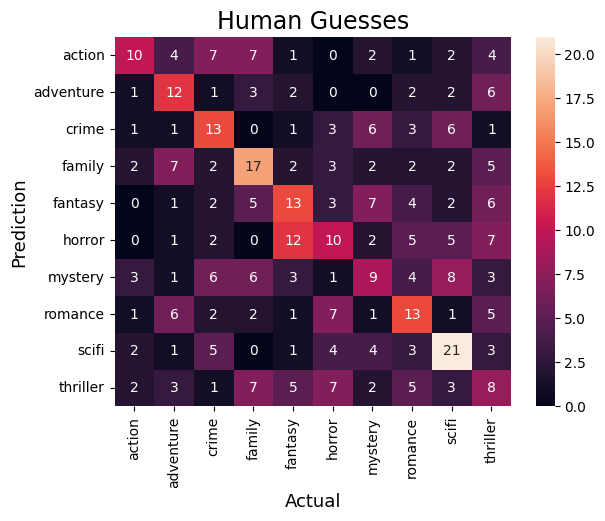

Precision: 0.3175055629909097  Recall: 0.31655395414248244  FScore: 0.3128287513713151
Accuracy: 0.31265508684863524


In [ ]:
labels = ['action', 'adventure', 'crime', 'family', 'fantasy', 'horror', 'mystery', 'romance', 'scifi', 'thriller']
brad_hat = [3, 7, 5, 2, 3, 1, 2, 7, 2, 4, 3, 1, 3, 8, 0, 7, 9, 8, 8, 5, 0, 2, 9, 3, 0, 6, 3, 9, 4, 3, 8, 4, 3, 1, 8, 0, 3, 7, 2, 8, 4, 9, 7, 6, 8, 4, 3, 9, 4, 6, 4, 2, 2, 2, 0, 6, 9, 2, 4, 8, 0, 6, 1, 1, 3, 8, 0, 4, 5, 7, 9, 7, 2, 5, 7, 8, 8, 7, 8, 0, 9, 1, 7, 5, 4, 6, 2, 6, 7, 7, 8, 0, 8, 1, 3, 7, 5, 6, 8, 1, 1, 9, 6, 9, 9, 5, 8, 2, 1, 8, 5, 4, 2, 2, 6, 3, 3, 8, 3, 0, 8, 8, 8, 4, 3, 2, 2, 4, 1, 9, 3, 3, 8, 7, 6, 5, 6, 3, 7, 3, 3, 1, 8, 6, 9, 5, 7, 2, 8, 4, 5, 8, 7, 5, 2, 7, 2, 8, 4, 8, 0, 9, 3, 1, 8, 6, 7, 3, 3, 0, 7, 5, 3, 6, 2, 5, 8, 3, 7, 2, 7, 0, 4, 8, 8, 8, 7, 8, 4, 5, 9, 6, 4, 6, 1, 8, 4, 8, 5, 0, 2, 8, 1]
brad_true = [4, 7, 5, 3, 3, 2, 8, 2, 6, 5, 0, 1, 0, 6, 9, 8, 9, 8, 6, 6, 2, 7, 9, 0, 0, 6, 7, 1, 5, 4, 8, 3, 0, 3, 6, 3, 9, 5, 5, 8, 6, 5, 8, 4, 2, 4, 3, 7, 5, 4, 6, 0, 2, 5, 8, 3, 1, 2, 5, 7, 0, 8, 6, 9, 3, 4, 9, 7, 5, 4, 6, 6, 8, 5, 9, 5, 5, 9, 8, 7, 1, 9, 6, 5, 4, 9, 3, 2, 9, 7, 8, 0, 3, 3, 3, 7, 5, 6, 2, 1, 0, 5, 0, 7, 4, 5, 8, 2, 3, 5, 9, 5, 2, 0, 6, 3, 7, 8, 3, 6, 9, 0, 2, 4, 9, 6, 0, 4, 7, 7, 3, 3, 8, 7, 8, 9, 8, 3, 7, 9, 1, 1, 9, 6, 9, 7, 4, 6, 8, 4, 9, 3, 3, 3, 0, 5, 6, 5, 4, 8, 0, 5, 4, 1, 8, 5, 7, 6, 3, 0, 2, 5, 3, 6, 6, 2, 8, 3, 9, 2, 3, 6, 5, 2, 9, 6, 6, 8, 5, 7, 0, 9, 9, 2, 1, 6, 5, 5, 3, 8, 8, 8, 1]

maxcy_hat = [5, 4, 2, 2, 6, 4, 2, 3, 3, 7, 3, 9, 6, 9, 0, 2, 2, 3, 1, 5, 5, 3, 0, 4, 1, 3, 2, 5, 4, 3, 0, 0, 4, 4, 9, 2, 5, 2, 9, 9, 5, 2, 7, 8, 9, 1, 0, 7, 8, 8, 5, 8, 8, 6, 6, 8, 6, 5, 8, 9, 2, 4, 5, 4, 9, 4, 1, 5, 6, 4, 9, 9, 6, 2, 8, 6, 7, 9, 3, 1, 0, 9, 9, 5, 5, 4, 1, 9, 2, 6, 4, 0, 6, 9, 6, 1, 9, 9, 5, 9]
maxcy_true = [2, 5, 2, 8, 6, 5, 2, 3, 6, 8, 9, 9, 5, 5, 0, 0, 6, 6, 1, 7, 8, 6, 0, 1, 0, 0, 4, 9, 9, 1, 0, 3, 6, 9, 7, 2, 4, 2, 0, 8, 5, 0, 7, 8, 4, 1, 0, 6, 1, 6, 9, 0, 8, 6, 6, 8, 2, 8, 8, 1, 2, 5, 9, 8, 5, 2, 7, 8, 4, 4, 9, 5, 2, 2, 1, 4, 7, 3, 1, 7, 6, 1, 3, 5, 3, 4, 1, 3, 1, 4, 4, 0, 0, 4, 7, 8, 0, 4, 7, 9]

dalton_hat = [9, 7, 6, 6, 5, 7, 8, 5, 1, 1, 7, 3, 8, 3, 2, 7, 6, 3, 5, 1, 6, 1, 6, 5, 9, 7, 6, 3, 8, 3, 9, 4, 1, 1, 7, 9, 2, 4, 1, 0, 7, 9, 8, 7, 5, 9, 4, 5, 2, 4, 8, 4, 7, 9, 3, 3, 2, 3, 1, 5, 9, 1, 1, 8, 4, 4, 4, 2, 6, 8, 3, 5, 2, 1, 4, 9, 2, 9, 7, 3, 1, 1, 5, 9, 7, 7, 1, 7, 9, 3, 9, 7, 3, 7, 3, 9, 8, 1, 9, 4]
dalton_true = [5, 7, 4, 3, 4, 4, 6, 4, 1, 7, 7, 9, 4, 6, 2, 7, 2, 9, 7, 3, 8, 5, 6, 2, 8, 5, 2, 3, 2, 0, 2, 4, 3, 9, 2, 6, 7, 9, 0, 1, 5, 9, 2, 5, 7, 4, 4, 7, 8, 9, 6, 4, 7, 3, 3, 0, 9, 6, 3, 5, 9, 7, 1, 8, 5, 4, 3, 4, 4, 8, 3, 9, 2, 4, 0, 8, 0, 4, 1, 9, 7, 1, 8, 6, 0, 4, 0, 7, 3, 4, 1, 1, 4, 9, 3, 0, 8, 3, 7, 1]

predictions = brad_hat + maxcy_hat + dalton_hat
true = brad_true + maxcy_true + dalton_true
# pred = brad_hat.extend(maxcy_hat)
# pred = pred.extend(dalton_hat)
# true = brad_true.extend(maxcy_true)
# true = true.extend(dalton_true)

conf_matrix = confusion_matrix(true, predictions)

sns.heatmap(conf_matrix,
      annot=True,
      fmt='g',
      xticklabels=labels,
      yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Human Guesses',fontsize=17)
plt.show()

precision, recall, fscore, _ = precision_recall_fscore_support(true, predictions, average='macro')
accuracy = accuracy_score(true, predictions)
print('Precision:', precision, ' Recall:', recall, ' FScore:', fscore)
print('Accuracy:', accuracy)

In [ ]:
print(len(pred))

402
